In [1]:
import re
import warnings
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/yangyang/Desktop/DS/raw_data/emails2.csv')
df

,Unnamed: 0,file,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
0,0,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'tim.belden@enron.com'}),NaN,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p
1,1,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'john.lavorato@enron.com'}),Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p
2,2,allen-p/_sent_mail/100.,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'leah.arsdall@enron.com'}),Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p
3,3,allen-p/_sent_mail/1000.,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'randall.gay@enron.com'}),NaN,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,4,allen-p/_sent_mail/1001.,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'greg.piper@enron.com'}),Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p
5,5,allen-p/_sent_mail/1002.,<30965995.1075863688265.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 04:17:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'greg.piper@enron.com'}),Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Greg,\n\n How about either next Tuesday or Thu...",allen-p
6,6,allen-p/_sent_mail/1003.,<16254169.1075863688286.JavaMail.evans@thyme>,"Tue, 22 Aug 2000 07:44:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),"frozenset({'david.l.johnson@enron.com', 'john....",NaN,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,"david.l.johnson@enron.com, John Shafer",NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Please cc the following distribution list with...,allen-p
7,7,allen-p/_sent_mail/1004.,<17189699.1075863688308.JavaMail.evans@thyme>,"Fri, 14 Jul 2000 06:59:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'joyce.teixeira@enron.com'}),Re: PRC review - phone calls,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Joyce Teixeira,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,any morning between 10 and 11:30,allen-p
8,8,allen-p/_sent_mail/101.,<20641191.1075855687472.JavaMail.evans@thyme>,"Tue, 17 Oct 2000 02:26:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'mark.scott@enron.com'}),Re: High Speed Internet Access,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Mark Scott,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,1. login: pallen pw: ke9davis\n\n I don't thi...,allen-p
9,9,allen-p/_sent_mail/102.,<30795301.1075855687494.JavaMail.evans@thyme>,"Mon, 16 Oct 2000 06:44:00 -0700 (PDT)",frozenset({'phillip.allen@

In [3]:
df1 = df[['From','To']].copy()

In [4]:
def replace_all(eg):
    rep = {"(":"",
       ")":"",
      "{":"",
      "}":"",
      "'":"",
        '"':"",
      "frozenset":""}
    for i,j in rep.items():
        eg = eg.replace(i,j)
    return eg

In [5]:
df1['From'] = df1['From'].apply(lambda x : replace_all(str(x)))
df1['To'] = df1['To'].apply(lambda x : replace_all(str(x)))

In [6]:
cct = pd.concat([pd.Series(row['From'],row['To'].split(',')) for _,row in df1.iterrows()])

In [7]:
adj_mat1 = cct.reset_index()

In [8]:
adj_mat1.columns = ['To','From']
adj_mat1['tag'] = [i for i in range(3123028)]
adj_mat1.tail(5)

,To,From,tag
3123023,kori.loibl@enron.com,john.zufferli@enron.com,3123023
3123024,john.lavorato@enron.com,john.zufferli@enron.com,3123024
3123025,dawn.doucet@enron.com,john.zufferli@enron.com,3123025
3123026,jeanie.slone@enron.com,john.zufferli@enron.com,3123026
3123027,livia_zufferli@monitor.com,john.zufferli@enron.com,3123027


In [9]:
# mt3 is pure enron
is_To_enron = [bool('@enron.com' in i) for i in adj_mat1['To']]
adj_mat2 = adj_mat1[is_To_enron].copy()
is_From_enron = [bool('@enron.com' in i) for i in adj_mat2['From']]
adj_mat3 = adj_mat2[is_From_enron].copy()

In [10]:
# get naive adj matrix
adj_mat3['From'] = adj_mat3['From'].apply(lambda x: re.sub(r'@.*','',x))
adj_mat3['To'] = adj_mat3['To'].apply(lambda x: re.sub(r'@.*','',x))
adj_mat = adj_mat3.drop('tag',axis=1).copy()

In [11]:
# DELETE emails address that is not a person's name 
adj_mat_cleaned_to = adj_mat[[bool(re.match(r'^[a-zA-Z]',x) and
                                (not re.match(r'.*\.\..*',x)) and
                               (not re.match(r'^all\..+',x)) and
                               re.match(r'.+\..+',x)) for x in adj_mat['To']]].copy()
adj_mat_cleaned_all = adj_mat_cleaned_to[[bool(re.match(r'^[a-zA-Z]',x) and
                                (not re.match(r'.*\.\..*',x)) and
                               (not re.match(r'^all\..+',x)) and
                               re.match(r'.+\..+',x)) for x in adj_mat_cleaned_to['From']]].copy()

In [12]:
grouped_mat = adj_mat_cleaned_all.groupby(['From','To']).size().reset_index().copy()

In [89]:
# edge count bigger than n
n = 100
grouped_mat.columns = ['From','To','Count']
gm_count_btn = grouped_mat[grouped_mat['Count'] > n].copy()
gm_count_btn.head()

,From,To,Count
113,aimee.lannou,daren.farmer,207
303,aleck.dadson,richard.shapiro,121
495,amanda.rybarski,mike.maggi,137
523,ami.chokshi,daren.farmer,110
526,ami.chokshi,george.grant,153


In [90]:
g=nx.from_pandas_dataframe(gm_count_btn,'From','To','Count')

In [91]:
weights = np.array([n['Count'] for (a,b,n) in g.edges(data=True)])
max = np.max(weights); min = np.min(weights)
weights_scaled = (weights-min)/(max-min)
selected_dict = {}
values = sorted([ v for v in nx.degree(g).values()])
for key,value in nx.degree(g).items():
    if value > values[-10]:
        selected_dict[key] = key

In [107]:
dict = nx.degree_centrality(g)
a=sorted(dict,key=dict.__getitem__,reverse=True)[:10]

In [108]:
dict = nx.closeness_centrality(g)
b=sorted(dict,key=dict.__getitem__,reverse=True)[:10]

In [109]:
dict = nx.betweenness_centrality(g)
c=sorted(dict,key=dict.__getitem__,reverse=True)[:10]

In [110]:
set(a).intersection(set(b)).intersection(set(c))

{'kay.mann', 'sara.shackleton', 'tana.jones'}

In [87]:
nodes_closeness_sort = sorted(nx.closeness_centrality(g),key=nx.closeness_centrality(g).get,reverse=True)
nodes_closeness_sort[:5]

['mark.taylor',
 'louise.kitchen',
 'mark.haedicke',
 'david.delainey',
 'john.lavorato']

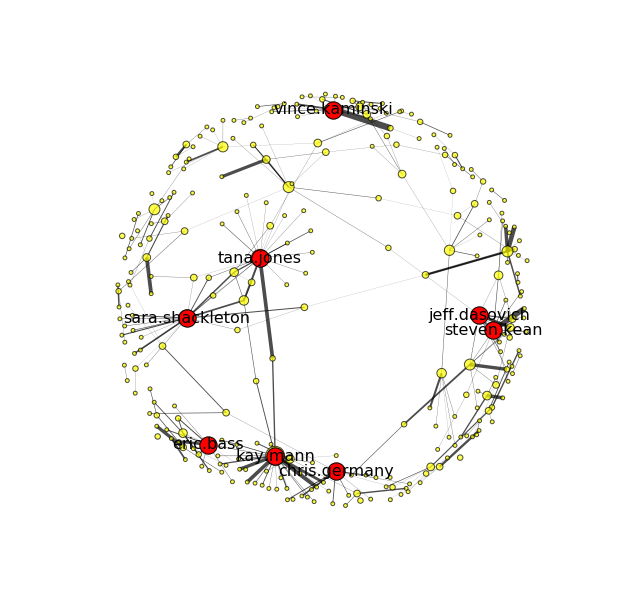

In [101]:
g=nx.from_pandas_dataframe(gm_count_btn,'From','To','Count')
weights = nx.get_edge_attributes(g,'Count')
plt.figure(figsize=(8,8)) 
node_position = nx.spring_layout(g,iterations=30)
nx.draw(g,pos= node_position,
        node_color='yellow', 
        with_labels= 0,
        nodelist = [k for k in nx.degree(g).keys()],
        node_size = [v*15 for v in nx.degree(g).values()],
        
        alpha=0.7,edge_color='black',
        width=weights_scaled*50+0.1)
labels = {}
nx.draw_networkx_nodes(g, pos=node_position, nodelist=selected_dict,node_color='red')
nx.draw_networkx_labels(g, pos=node_position, 
                        labels=selected_dict,
                        font_color = 'black',
                        font_size=16)
plt.show()


### egocentric 
- lower threshold to 5, so that can get more info

In [142]:
n = 15
grouped_mat.columns = ['From','To','Count']
gm_count_btn = grouped_mat[grouped_mat['Count'] > n].copy()
gm_count_btn.head()

,From,To,Count
29,adam.johnson,sean.boyle,50
49,admin.enron,eric.bass,26
63,administration.enron,maintenance.dl-exchange,56
66,adnan.patel,karen.lambert,22
96,adrianne.engler,jonathan.mckay,18


In [172]:
# test name and find out explicit address
name = 'bill.williams'
# gm_count_btn[[(name in x) or (name in y) for x,y in zip(gm_count_btn['To'],gm_count_btn['From'])]]

- mastermind email address
    - '	jeff.skilling'
    - '	kenneth.lay'
    - 'tim.belden'
    - ‘bill.williams’

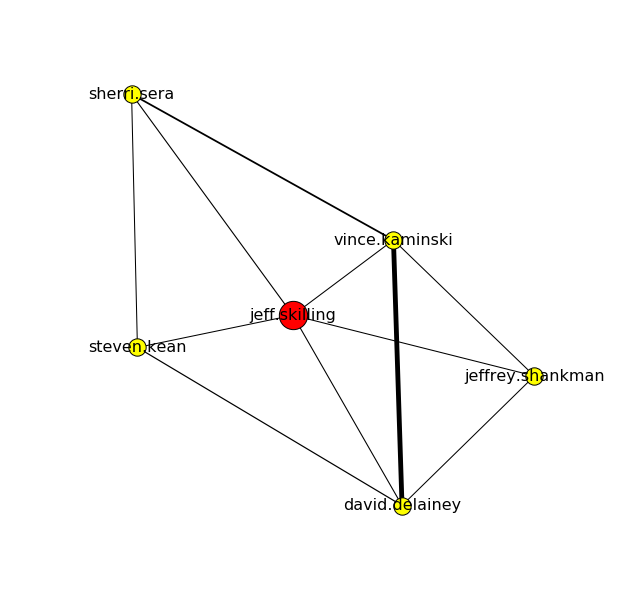

In [204]:
name = 'jeff.skilling'
g2=nx.from_pandas_dataframe(gm_count_btn,'From','To','Count')

g_ego = nx.ego_graph(g2,name,radius=1,center=True)
plt.figure(figsize=(8,8))
# nodes_position = nx.spring_layout(g_ego,iterations=10)
nodes_position = nx.fruchterman_reingold_layout(g_ego)

weights = np.array([n['Count'] for (a,b,n) in g2.edges(data=True)])
max = np.max(weights); min = np.min(weights)
weights_scaled = (weights-min)/(max-min)

nx.draw(g_ego,pos=nodes_position,width=weights_scaled*50+1,node_color='yellow')

nx.draw_networkx_nodes(g, pos=nodes_position, 
                       nodelist={name:name},
                       node_size = 800,
                       node_color='red')

nx.draw_networkx_labels(g_ego, pos=nodes_position, 
                        font_color = 'black',
                        font_size=16)
plt.show()

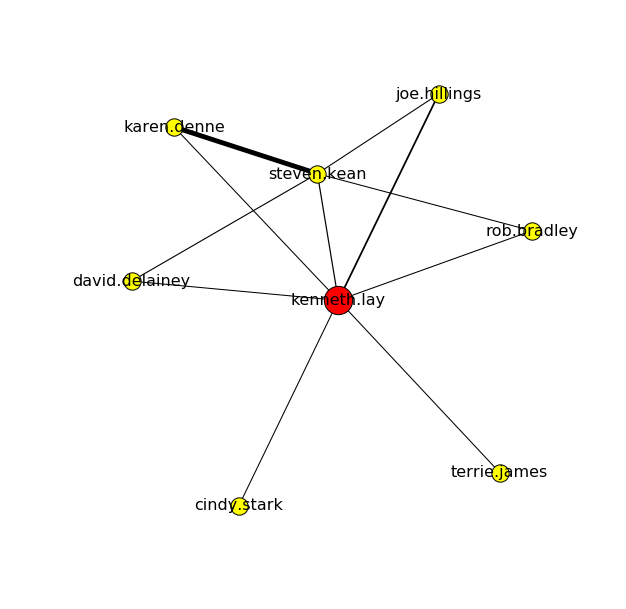

In [207]:
name = 'kenneth.lay'
g2=nx.from_pandas_dataframe(gm_count_btn,'From','To','Count')

g_ego = nx.ego_graph(g2,name,radius=1,center=True)
plt.figure(figsize=(8,8))
# nodes_position = nx.spring_layout(g_ego,iterations=10)
nodes_position = nx.fruchterman_reingold_layout(g_ego)

weights = np.array([n['Count'] for (a,b,n) in g2.edges(data=True)])
max = np.max(weights); min = np.min(weights)
weights_scaled = (weights-min)/(max-min)

nx.draw(g_ego,pos=nodes_position,width=weights_scaled*50+1,node_color='yellow')

nx.draw_networkx_nodes(g, pos=nodes_position, 
                       nodelist={name:name},
                       node_size = 800,
                       node_color='red')

nx.draw_networkx_labels(g_ego, pos=nodes_position, 
                        font_color = 'black',
                        font_size=16)
plt.show()

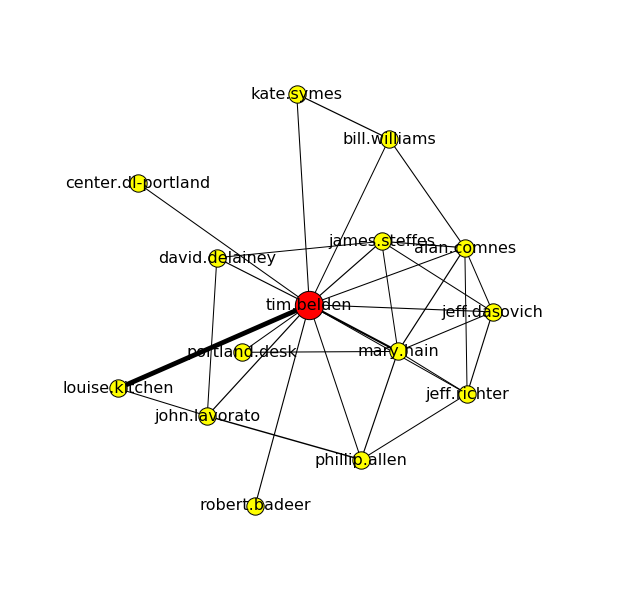

In [209]:
name = 'tim.belden'
g2=nx.from_pandas_dataframe(gm_count_btn,'From','To','Count')

g_ego = nx.ego_graph(g2,name,radius=1,center=True)
plt.figure(figsize=(8,8))
# nodes_position = nx.spring_layout(g_ego,iterations=10)
nodes_position = nx.fruchterman_reingold_layout(g_ego)

weights = np.array([n['Count'] for (a,b,n) in g2.edges(data=True)])
max = np.max(weights); min = np.min(weights)
weights_scaled = (weights-min)/(max-min)

nx.draw(g_ego,pos=nodes_position,width=weights_scaled*50+1,node_color='yellow')

nx.draw_networkx_nodes(g, pos=nodes_position, 
                       nodelist={name:name},
                       node_size = 800,
                       node_color='red')

nx.draw_networkx_labels(g_ego, pos=nodes_position, 
                        font_color = 'black',
                        font_size=16)
plt.show()

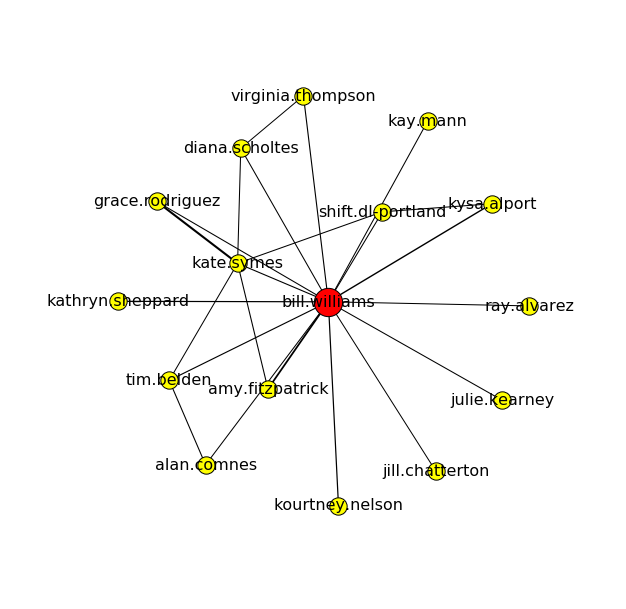

In [210]:
name = 'bill.williams'
g2=nx.from_pandas_dataframe(gm_count_btn,'From','To','Count')

g_ego = nx.ego_graph(g2,name,radius=1,center=True)
plt.figure(figsize=(8,8))
# nodes_position = nx.spring_layout(g_ego,iterations=10)
nodes_position = nx.fruchterman_reingold_layout(g_ego)

weights = np.array([n['Count'] for (a,b,n) in g2.edges(data=True)])
max = np.max(weights); min = np.min(weights)
weights_scaled = (weights-min)/(max-min)

nx.draw(g_ego,pos=nodes_position,width=weights_scaled*50+1,node_color='yellow')

nx.draw_networkx_nodes(g, pos=nodes_position, 
                       nodelist={name:name},
                       node_size = 800,
                       node_color='red')

nx.draw_networkx_labels(g_ego, pos=nodes_position, 
                        font_color = 'black',
                        font_size=16)
plt.show()

### centiment analysis

In [22]:
from textblob import TextBlob

In [23]:
content_people_one = df[['kay.mann' in x for x in df['From']]][['Date','content']].copy()

In [31]:
content_people_one

,Date,content,polarity,date_formated
9506,"Mon, 4 Feb 2002 14:16:59 -0800 (PST)",We are in a loop. We need a process to deal w...,0.200000,2002-02-04
9863,"Tue, 22 Jan 2002 09:09:55 -0800 (PST)",I'm looking for ISDA's between Enron MW and EN...,0.050000,2002-01-22
9896,"Mon, 28 Jan 2002 11:54:59 -0800 (PST)",Could I get a copy of the Midland Cogeneration...,0.064286,2002-01-28
128159,"Thu, 28 Mar 2002 12:46:54 -0800 (PST)",Here's a revised letter:\n\n,0.000000,2002-03-28
128162,"Thu, 28 Mar 2002 06:49:42 -0800 (PST)",We can work with it either way. \n------------...,0.000000,2002-03-28
128163,"Thu, 28 Mar 2002 06:27:52 -0800 (PST)",Dominion's lawyer left me a message that they ...,-0.009375,2002-03-28
128166,"Wed, 27 Mar 2002 12:34:16 -0800 (PST)",comments?\n\n \n\nI've sent this to Mark E as ...,0.000000,2002-03-27
128169,"Wed, 27 Mar 2002 10:47:40 -0800 (PST)","I've left a message for Dominion's counsel, te...",0.037153,2002-03-27
128193,"Wed, 6 Mar 2002 12:02:01 -0800 (PST)","If is was an ENA deal, the Dec. 3 is correct p...",0.065797,2002-03-06
128300,"Tue, 19 Feb 2002 15:43:14 -0800 (PST)",Shemin Proctor (an outside lawyer who is helpi...,0.045629,2002-02-19


In [24]:
from dateutil import parser
import datetime
def format_date(str):
    dt_obj = parser.parse(str)
    return  datetime.date(dt_obj.year,dt_obj.month,dt_obj.day)

In [25]:
def get_content_polarity(content):
    blob = TextBlob(content)
    sentences_polarity = []
    for sentence in blob.sentences:
        sentences_polarity.append(sentence.sentiment.polarity)
    return np.mean(sentences_polarity)
content_people_one['polarity'] = content_people_one['content'].apply(lambda x:get_content_polarity(x))

In [26]:
content_people_one['date_formated'] = content_people_one['Date'].apply(lambda x: format_date(x))

In [27]:
date_polarity = content_people_one.groupby('date_formated').agg({'polarity':np.mean}).reset_index()[1:]

In [28]:
date_polarity

,date_formated,polarity
1,2000-06-02,0.056561
2,2000-06-05,0.016171
3,2000-06-06,0.051254
4,2000-06-07,-0.048333
5,2000-06-08,0.056332
6,2000-06-09,-0.005564
7,2000-06-12,0.000546
8,2000-06-13,0.056907
9,2000-06-15,0.080312
10,2000-06-16,0.120655


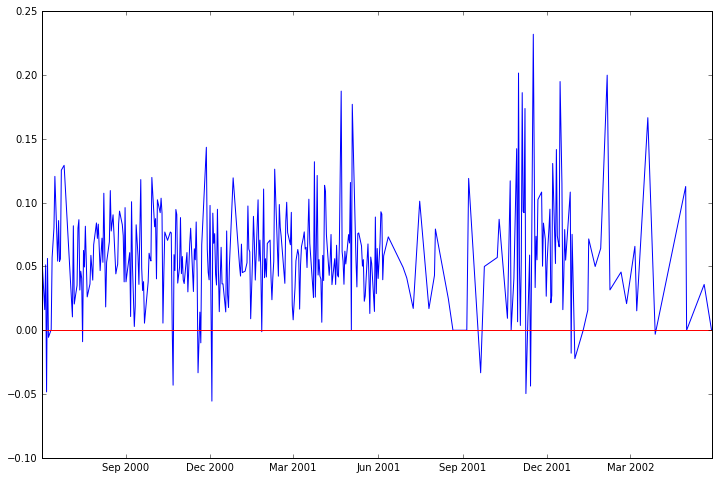

In [29]:
%matplotlib inline
plt.figure(figsize=(12,8)) 
plt.plot(date_polarity['date_formated'],date_polarity['polarity'])
plt.plot(date_polarity['date_formated'],np.zeros(date_polarity.shape[0]),color='r')

In [32]:
content_people_two = df[['sara.shackleton' in x for x in df['From']]][['Date','content']].copy()
content_people_two['date_formated'] = content_people_two['Date'].apply(lambda x: format_date(x))
content_people_two['polarity'] = content_people_two['content'].apply(lambda x:get_content_polarity(x))
date_polarity2 = content_people_two.groupby('date_formated').agg({'polarity':np.mean}).reset_index()

In [33]:
date_polarity2 = date_polarity2[1:]

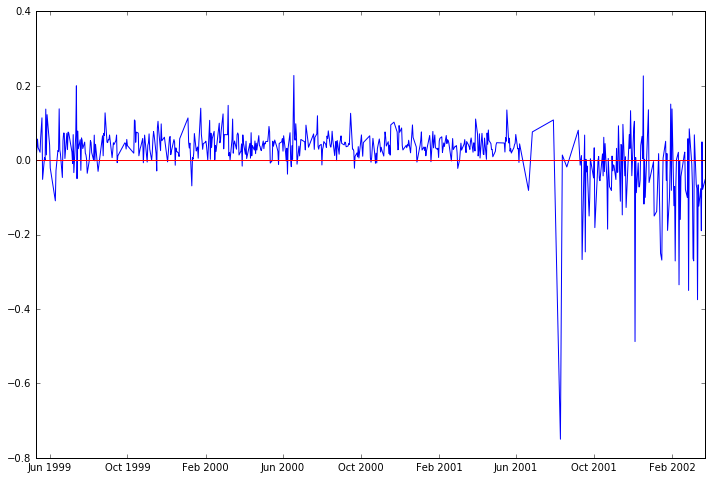

In [34]:
plt.figure(figsize=(12,8)) 
plt.plot(date_polarity2['date_formated'],date_polarity2['polarity'])
plt.plot(date_polarity2['date_formated'],np.zeros(date_polarity2.shape[0]),color='r')

In [35]:
content_people_three = df[['tana.jones' in x for x in df['From']]][['Date','content']].copy()
content_people_three['date_formated'] = content_people_three['Date'].apply(lambda x: format_date(x))
content_people_three['polarity'] = content_people_three['content'].apply(lambda x:get_content_polarity(x))
date_polarity3 = content_people_three.groupby('date_formated').agg({'polarity':np.mean}).reset_index()

In [36]:
date_polarity3 = date_polarity3[1:]

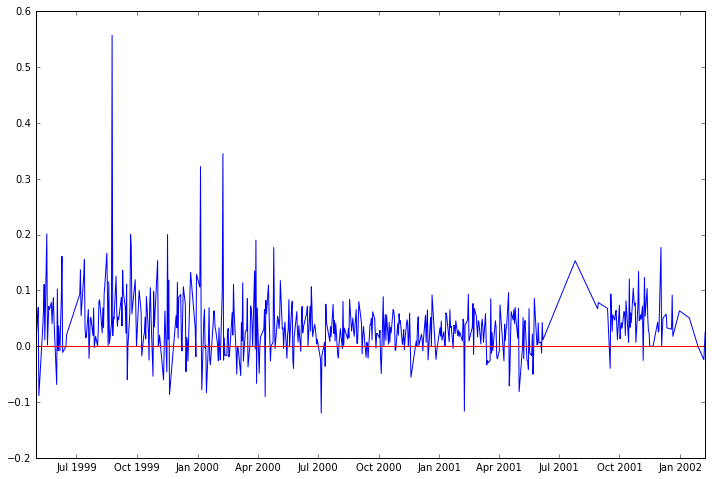

In [39]:
plt.figure(figsize=(12,8)) 
line = plt.plot(date_polarity3['date_formated'],date_polarity3['polarity'])
threshold = plt.plot(date_polarity3['date_formated'],np.zeros(date_polarity3.shape[0]),color='r')
# from scipy.interpolate import interp1d
# smoothed = interp1d(date_polarity3['date_formated'], date_polarity3['polarity'], kind='cubic')